# Training (modeling with TensorFlow)

In [ ]:
numerical = [
            'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 
             'latitude','longitude', 'accommodates', 'bathroom_qty', 'bedrooms', 'beds',
            ]
categorical = [
                'host_response_time','host_is_superhost', 
                'host_verifications_work_email','host_has_profile_pic',
                'neighbourhood_cleansed', 'room_type', 'property_description', 'bathroom_type', 
                'gym','pool','kitchen','parking','washer','dryer','conditioning','heating','workspace',
                'tv','hair dryer','iron','hot tub','crib','bbq','fireplace','smoking', 'coffee maker', 
               'instant_bookable',
              ]
label=['log_price']

## 1. Reading Needed Data

In [ ]:
import os

import json
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_pickle("../data/listings_cleaned.pkl")
data.loc[:,"log_price"] = np.log(data.loc[:,"price"])
data = data[numerical + categorical + label]
data.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathroom_qty,bedrooms,beds,host_response_time,...,hair dryer,iron,hot tub,crib,bbq,fireplace,smoking,coffee maker,instant_bookable,log_price
1,1.0,0.83,7,19.43542,-99.13802,2,1.5,1.0,2.0,within_a_day,...,1,1,1,0,0,0,0,1,False,8.162231
2,1.0,0.83,7,19.43423,-99.13718,4,2.5,2.0,4.0,within_a_day,...,1,1,0,0,0,0,0,1,False,8.612322
3,1.0,0.98,10,19.43826,-99.13660,4,1.0,2.0,2.0,within_an_hour,...,1,1,0,0,0,0,1,1,True,6.754604
5,1.0,0.82,17,19.41162,-99.17794,14,5.5,5.0,8.0,within_an_hour,...,1,1,0,0,0,0,0,1,False,9.798127
6,1.0,1.00,2,19.41936,-99.17281,3,1.0,1.0,1.0,within_an_hour,...,1,1,0,1,0,0,1,1,True,8.103797


In [ ]:
data.dtypes

host_response_rate               float64
host_acceptance_rate             float64
host_total_listings_count          int64
latitude                         float64
longitude                        float64
accommodates                       int64
bathroom_qty                     float64
bedrooms                         float64
beds                             float64
host_response_time                object
host_is_superhost                   bool
host_verifications_work_email      int64
host_has_profile_pic                bool
neighbourhood_cleansed            object
room_type                         object
property_description              object
bathroom_type                     object
gym                                int64
pool                               int64
kitchen                            int64
parking                            int64
washer                             int64
dryer                              int64
conditioning                       int64
heating         

## 2. Dummy Variables (Categorical Data)

In [ ]:
data = pd.get_dummies(data, columns=categorical, drop_first=True)
data.columns

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathroom_qty', 'bedrooms', 'beds', 'log_price',
       'host_response_time_within_a_day',
       'host_response_time_within_a_few_hours',
       'host_response_time_within_an_hour', 'host_is_superhost_True',
       'host_verifications_work_email_1', 'host_has_profile_pic_True',
       'neighbourhood_cleansed_azcapotzalco',
       'neighbourhood_cleansed_benito_juarez',
       'neighbourhood_cleansed_coyoacan',
       'neighbourhood_cleansed_cuajimalpa_de_morelos',
       'neighbourhood_cleansed_cuauhtemoc',
       'neighbourhood_cleansed_gustavo_a._madero',
       'neighbourhood_cleansed_iztacalco', 'neighbourhood_cleansed_iztapalapa',
       'neighbourhood_cleansed_la_magdalena_contreras',
       'neighbourhood_cleansed_miguel_hidalgo',
       'neighbourhood_cleansed_milpa_alta', 'neighbourhood_cleansed_tlahuac',
       'neighbourhood_cleansed_tlalp

In [ ]:
data=data.astype('float32')
data.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathroom_qty,bedrooms,beds,log_price,...,tv_1,hair dryer_1,iron_1,hot tub_1,crib_1,bbq_1,fireplace_1,smoking_1,coffee maker_1,instant_bookable_True
1,1.0,0.83,7.0,19.435419,-99.138023,2.0,1.5,1.0,2.0,8.162231,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.83,7.0,19.434231,-99.137177,4.0,2.5,2.0,4.0,8.612322,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.98,10.0,19.438259,-99.136597,4.0,1.0,2.0,2.0,6.754604,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,1.0,0.82,17.0,19.411619,-99.177940,14.0,5.5,5.0,8.0,9.798127,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,1.00,2.0,19.419359,-99.172813,3.0,1.0,1.0,1.0,8.103797,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


## 3. Splitting Data

In [ ]:
train_size = .8

# Split:
train_dataset = data.sample(frac=train_size, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [ ]:
train_dataset.shape, test_dataset.shape

((16458, 98), (4115, 98))

In [ ]:
# Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_label = train_features.pop('log_price')
test_label = test_features.pop('log_price')

In [ ]:
train_features.columns

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathroom_qty', 'bedrooms', 'beds', 'host_response_time_within_a_day',
       'host_response_time_within_a_few_hours',
       'host_response_time_within_an_hour', 'host_is_superhost_True',
       'host_verifications_work_email_1', 'host_has_profile_pic_True',
       'neighbourhood_cleansed_azcapotzalco',
       'neighbourhood_cleansed_benito_juarez',
       'neighbourhood_cleansed_coyoacan',
       'neighbourhood_cleansed_cuajimalpa_de_morelos',
       'neighbourhood_cleansed_cuauhtemoc',
       'neighbourhood_cleansed_gustavo_a._madero',
       'neighbourhood_cleansed_iztacalco', 'neighbourhood_cleansed_iztapalapa',
       'neighbourhood_cleansed_la_magdalena_contreras',
       'neighbourhood_cleansed_miguel_hidalgo',
       'neighbourhood_cleansed_milpa_alta', 'neighbourhood_cleansed_tlahuac',
       'neighbourhood_cleansed_tlalpan',
       'neighbo

## 4. Scaling (Numerical Data)

We will prepare a normalizer we will then append as a layer on our Tensorflow model:

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[ 9.68411803e-01  9.46432948e-01  3.27687492e+01  1.94058876e+01
  -9.91667938e+01  3.41451216e+00  1.48013198e+00  1.54739320e+00
   2.01834989e+00  5.14643379e-02  1.02199517e-01  8.34244728e-01
   4.44221824e-01  1.43395394e-01  9.88455355e-01  9.84324049e-03
   1.19334094e-01  6.14899211e-02  1.61015838e-02  4.71138895e-01
   1.61623638e-02  1.39749674e-02  9.47867893e-03  3.09879659e-03
   1.77785948e-01  7.29128951e-04  1.64053997e-03  2.77068913e-02
   2.75853835e-02  5.28618321e-03  4.01020562e-03  3.02345604e-01
   1.25167100e-02  0.00000000e+00  1.18483445e-02  7.47356657e-03
   3.03803652e-04  1.33673544e-03  0.00000000e+00  1.16052888e-02
   6.07607362e-05  6.07607071e-05  1.74504936e-01  6.07607188e-04
   2.43042916e-04  0.00000000e+00  1.21521429e-04  1.21521443e-04
   2.09624488e-02  1.56155070e-02  7.89889658e-04  1.09247811e-01
   6.07607217e-05  5.10390336e-03  1.84712652e-02  6.07606853e-05
   6.07607013e-04  6.07607290e-05  6.88419268e-02  2.43042974e-04
   0.00000

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  1.     0.79   6.    19.36 -99.17   2.     1.     1.     1.     0.
    0.     1.     1.     0.     1.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     1.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     1.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
    1.     0.     0.     0.     0.     0.     0.     1.     0.     1.
    0.     0.     0.     0.     0.     1.     0.  ]]

Normalized: [[ 0.3  -1.24 -0.26 -1.22 -0.22 -0.61 -0.42 -0.48 -0.55 -0.23 -0.34  0.45
   1.12 -0.41  0.11 -0.1  -0.37 -0.26 -0.13 -0.94 -0.13 -0.12 -0.1  -0.06
  -0.47 -0.03 -0.04 -0.17 -0.17 -0.07 -0.06  1.52 -0.11  0.   -0.11 -0.09
  -0.02 -0.04  0.   -0.11 -0.01 -0.01 -0.46 -0.02 -0.02  0.   -0.01

## 5. Feature Cross (Location Data)

We'll be using a feature cross, meaning we will split the longitude*langitude map into equally spreaded grids by iterating from the minimum to the maximum value with an iteration of (max-min)/100 (100x100 grid).

**Docs**: [Introducing TensorFlow Feature Columns](https://developers.googleblog.com/2017/11/introducing-tensorflow-feature-columns.html)

**Example**: 

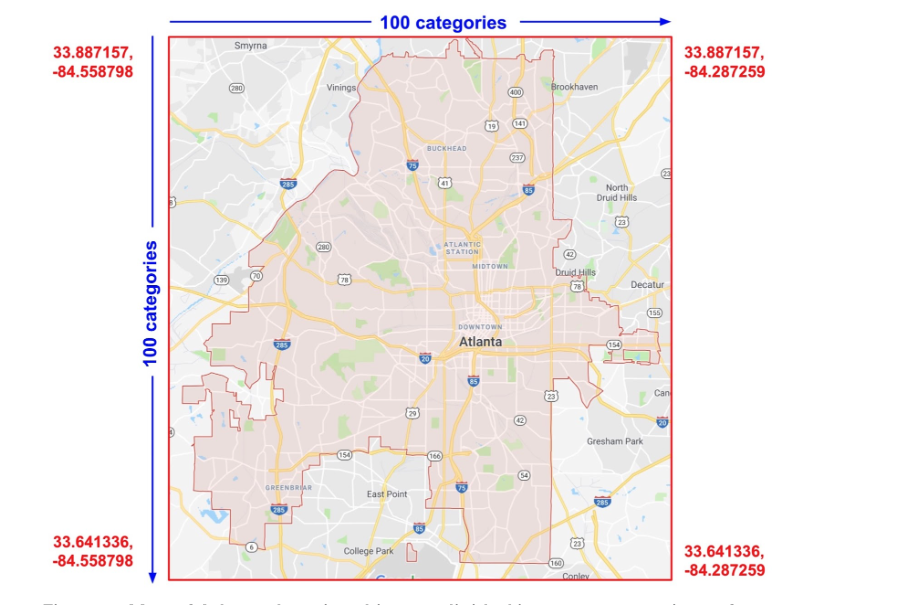

In [ ]:
max_long=train_dataset['longitude'].max()
min_long=train_dataset['longitude'].min()

diff=max_long-min_long
diff/=100

long_boundaries=[]
for i in np.arange(min_long, max_long, diff):
    long_boundaries.append(min_long+i*diff)

    
max_lat=train_dataset['latitude'].max()
min_lat=train_dataset['latitude'].min()

d=max_lat-min_lat
d/=100

lat_boundaries=[]
for i in np.arange(min_lat, max_lat, d):
    lat_boundaries.append(min_lat+i*d)

In [ ]:
lat_boundaries

[19.249284818456434,
 19.24929857847402,
 19.2493123384916,
 19.24932609850918,
 19.249339858526763,
 19.249353618544344,
 19.249367378561928,
 19.24938113857951,
 19.24939489859709,
 19.249408658614673,
 19.249422418632253,
 19.249436178649834,
 19.249449938667418,
 19.249463698685,
 19.249477458702582,
 19.249491218720163,
 19.249504978737743,
 19.249518738755327,
 19.249532498772908,
 19.249546258790488,
 19.249560018808072,
 19.249573778825653,
 19.249587538843237,
 19.249601298860817,
 19.249615058878398,
 19.24962881889598,
 19.249642578913562,
 19.249656338931143,
 19.249670098948727,
 19.249683858966307,
 19.24969761898389,
 19.24971137900147,
 19.249725139019052,
 19.249738899036636,
 19.249752659054217,
 19.2497664190718,
 19.24978017908938,
 19.24979393910696,
 19.249807699124545,
 19.249821459142126,
 19.249835219159706,
 19.24984897917729,
 19.24986273919487,
 19.249876499212455,
 19.249890259230035,
 19.249904019247616,
 19.2499177792652,
 19.24993153928278,
 19.249945299

We will use these boundaries to build a new feature column that we will later append as a layer of our model (defining a bucketed column with boundaries defined and creating a DenseFeatures layer, which will be passed to the Keras API later).

# 6. Training
- Docs: training examples for TF Regression in https://www.tensorflow.org/tutorials/keras/regression.

In [ ]:
rmse=tf.keras.metrics.RootMeanSquaredError()

# Function to plot training vs validation loss.
def plot_loss(history, ylim=20):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, ylim])
  plt.xlabel('Epoch')
  plt.ylabel('Error [LOG PRICE]')
  plt.legend()
  plt.grid(True)

test_results = {}

## [1] Simple Linear Regression

In [ ]:
## [1] Simple Linear Regression
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 97)                195       
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 98        
                                                                 
Total params: 293 (1.15 KB)
Trainable params: 98 (392.00 Byte)
Non-trainable params: 195 (784.00 Byte)
_________________________________________________________________


In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    loss='mean_squared_error',
    metrics=['mae',rmse])

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_label,
    epochs=10,
    # Suppress logging.
    verbose=2,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/10
412/412 - 0s - loss: 464.1378 - mae: 4.4791 - root_mean_squared_error: 21.5439 - val_loss: 256.5491 - val_mae: 3.4608 - val_root_mean_squared_error: 16.0172 - 430ms/epoch - 1ms/step
Epoch 2/10
412/412 - 0s - loss: 193.7251 - mae: 2.8400 - root_mean_squared_error: 13.9185 - val_loss: 207.8382 - val_mae: 1.6289 - val_root_mean_squared_error: 14.4166 - 178ms/epoch - 432us/step
Epoch 3/10
412/412 - 0s - loss: 82.2460 - mae: 1.8329 - root_mean_squared_error: 9.0690 - val_loss: 212.9092 - val_mae: 1.2046 - val_root_mean_squared_error: 14.5914 - 269ms/epoch - 654us/step
Epoch 4/10
412/412 - 0s - loss: 33.0801 - mae: 1.3006 - root_mean_squared_error: 5.7515 - val_loss: 210.1734 - val_mae: 1.1736 - val_root_mean_squared_error: 14.4974 - 183ms/epoch - 445us/step
Epoch 5/10
412/412 - 0s - loss: 13.4044 - mae: 0.9461 - root_mean_squared_error: 3.6612 - val_loss: 231.4913 - val_mae: 1.8691 - val_root_mean_squared_error: 15.2148 - 179ms/epoch - 433us/step
Epoch 6/10
412/412 - 0s - loss: 5

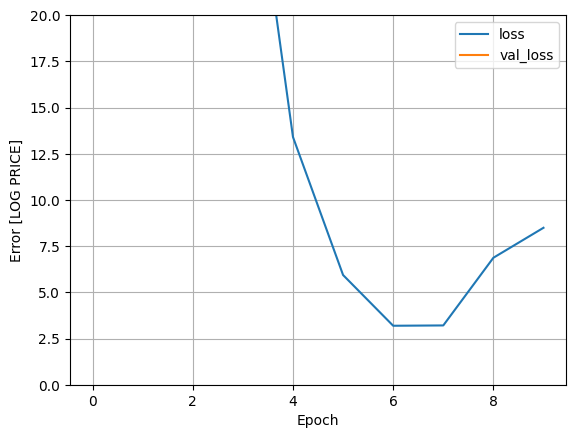

In [ ]:
plot_loss(history)

We can observe how the linear model doesn't do well for our specific use case:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    x=test_features, y=test_label, verbose=0)

In [ ]:
test_results

{'linear_model': [1173385216.0, 969.7213134765625, 34254.7109375]}

In [ ]:
linear_model.metrics_names

['loss', 'mae', 'root_mean_squared_error']

## [2] Regression with DNN (no feature cross for location)

In [ ]:
## [2] Regression with DNN (no feature cross for location)

model = tf.keras.Sequential([
  # feature_layer,
    normalizer,
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    # layers.Dropout(0.3),
    layers.Dense(32,activation='relu'),
    layers.Dense(1)

])

opt=tf.keras.optimizers.legacy.Adam(learning_rate=0.05)
rmse=tf.keras.metrics.RootMeanSquaredError()
model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mae',rmse])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 97)                195       
 on)                                                             
                                                                 
 dense_1 (Dense)             (None, 128)               12544     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 23108 (90.27 KB)
Trainable params: 22913 (89.50 KB)
Non-trainable params: 195 (784.00 Byte)
______________

In [ ]:
history = model.fit(
    train_features,
    train_label,
    validation_split=0.2,
    epochs=15,
    batch_size=64,
    verbose=0,
)

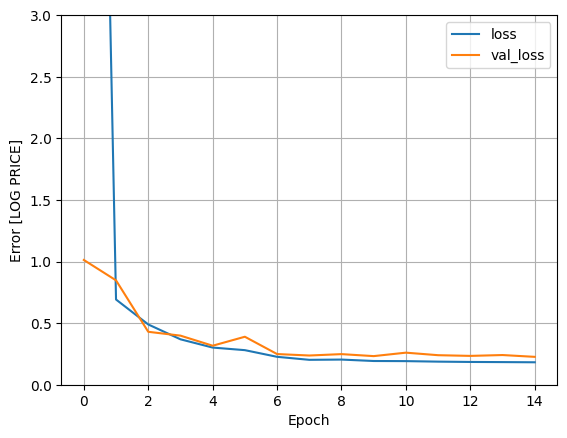

In [ ]:
plot_loss(history, 3)

In [ ]:
test_results['dnn_model'] = model.evaluate(
    x=test_features, y=test_label, verbose=0)

In [ ]:
test_results

{'linear_model': [1173385216.0, 969.7213134765625, 34254.7109375],
 'dnn_model': [31000650.0, 152.61968994140625, 5567.82275390625]}

In [ ]:
model.metrics_names

['loss', 'mae', 'root_mean_squared_error']

## [3] Regression with DNN (whith feature cross for location)

- [Representation with a Feature Cross [Colab Notebook]](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/representation_with_a_feature_cross.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=representation_tf2-colab&hl=id#scrollTo=qn2PRDBEr5ni)
- Functional vs Sequential API:[Input Keras Layer Explanation](https://wandb.ai/ayush-thakur/dl-question-bank/reports/Input-Keras-Layer-Explanation-With-Code-Samples--VmlldzoyMDIzMDU) and [Stackoverflow answer](https://stackoverflow.com/questions/66879748/what-is-the-difference-between-tf-keras-model-and-tf-keras-sequential).

In [ ]:
## [3] Regression with DNN (whith feature cross for location)
# Keras Input tensors of float values.
inputs = {
    'latitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='latitude'),
    'longitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='longitude')
}

# Create a Discretization layer to separate the latitude data into buckets.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=lat_boundaries,
    name='discretization_latitude')(inputs.get('latitude'))
latitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(lat_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_latitude')(latitude)

longitude = tf.keras.layers.Discretization(
    bin_boundaries=long_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))
longitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(long_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_longitude')(longitude)

concatenate_layer = tf.keras.layers.Concatenate()([latitude, longitude])

x = layers.Dense(128,activation='relu')(concatenate_layer)
x = layers.Dense(64,activation='relu')(x)
x = layers.Dense(32,activation='relu')(x)
outputs = layers.Dense(1)(x)

# Define an output dictionary we'll send to the model constructor.
outputs = {
  'dense_output': outputs
}

In [ ]:
model_fc = tf.keras.Model(inputs=inputs, outputs=outputs)
model_fc.compile(
    optimizer=tf.keras.optimizers.legacy.RMSprop(
    learning_rate=0.05),
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Train Model
features = {name:np.array(value) for name, value in train_dataset.items()}
label = np.array(features.pop('log_price'))
history = model_fc.fit(
    x=features, 
    y=label, 
    batch_size=64,
    epochs=100, 
    validation_split=0.2,
    verbose=2,
)

In [ ]:
model_fc.summary(expand_nested=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 latitude (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 longitude (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 discretization_latitude (D  (None, 1)                    0         ['latitude[0][0]']            
 iscretization)                                                                                   
                                                                                                  
 discretization_longitude (  (None, 1)                    0         ['longitude[0][0]']       

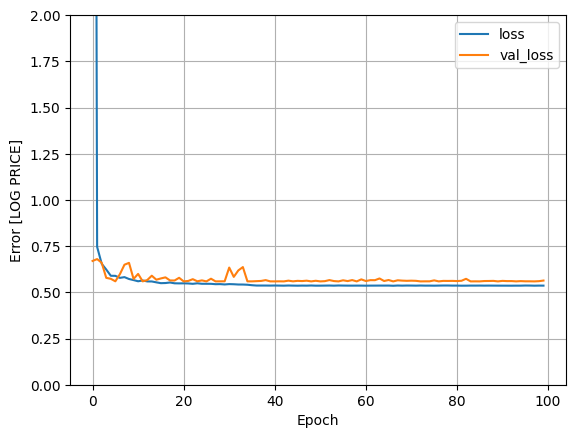

In [ ]:
plot_loss(history, 2)

In [ ]:
test_results['dnn_model_fc'] = model_fc.evaluate(
    x={'latitude': test_features['latitude'], 'longitude': test_features['longitude']}, y=test_label, verbose=0)

In [ ]:
test_results

{'linear_model': [1173385216.0, 969.7213134765625, 34254.7109375],
 'dnn_model': [31000650.0, 152.61968994140625, 5567.82275390625],
 'dnn_model_fc': [0.5520085692405701, 0.7429727911949158]}

In [ ]:
model_fc.metrics_names

['loss', 'root_mean_squared_error']

## [4] Regression with DNN (with all features + feature cross for location)

In [ ]:
numerical = [
            'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count',
            'accommodates', 'bathroom_qty', 'bedrooms', 'beds',
            ]
geo = ['latitude','longitude']
categorical = [
                'host_response_time','host_is_superhost', 
                'host_verifications_work_email','host_has_profile_pic',
                'neighbourhood_cleansed', 'room_type', 'property_description', 'bathroom_type', 
                'gym','pool','kitchen','parking','washer','dryer','conditioning','heating','workspace',
                'tv','hair dryer','iron','hot tub','crib','bbq','fireplace','smoking', 'coffee maker', 
               'instant_bookable',
              ]
label=['log_price']

In [ ]:
train_features.shape[1]

97

In [ ]:
len(numerical), train_features.shape[1] - len(geo) - len(numerical)

(7, 88)

In [ ]:
## [4] Regression with DNN (whith all features + feature cross for location)

# Define the input layers
inputs_all = {
    'latitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='latitude'),
    'longitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='longitude'),
    'other_numerical': 
        tf.keras.layers.Input(shape=(len(numerical),), name='other_features_numerical'),
    'other_categorical': 
        tf.keras.layers.Input(shape=(train_features.shape[1] - len(geo) - len(numerical),), name='other_features_categorical')
}

In [ ]:
# Define the preprocessing layers:

# Normalization layer.
normalizer_rest = tf.keras.layers.Normalization(axis=-1)
numerical_features = train_features[numerical]
normalizer_rest.adapt(np.array(numerical_features)),

# Discretization layer to separate the latitude data into buckets.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=lat_boundaries,
    name='discretization_latitude')(inputs_all['latitude'])
latitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(lat_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_latitude')(latitude)

longitude = tf.keras.layers.Discretization(
    bin_boundaries=long_boundaries,
    name='discretization_longitude')(inputs_all['longitude'])
longitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(long_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_longitude')(longitude)

other_features_numerical = normalizer_rest(inputs_all['other_numerical'])
other_features_categorical = inputs_all['other_categorical']

# Concatenate preprocessed inputs
concatenated_features = tf.keras.layers.Concatenate()([latitude, longitude, other_features_numerical, other_features_categorical])

In [ ]:
# Build the model
x = layers.Dense(128, activation='relu')(concatenated_features)
x = layers.Dense(64, activation='relu')(x)
# x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(1)(x)

model_fc_all = tf.keras.Model(inputs=inputs_all, outputs=output)

In [ ]:
# Compile the model
model_fc_all.compile(
    optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.05),
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model_fc_all.summary(expand_nested=True)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 latitude (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 longitude (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 discretization_latitude (D  (None, 1)                    0         ['latitude[0][0]']            
 iscretization)                                                                                   
                                                                                                  
 discretization_longitude (  (None, 1)                    0         ['longitude[0][0]']     

In [ ]:
# Fit the model
history = model_fc_all.fit(
    {
        'latitude': train_features['latitude'], 
        'longitude': train_features['longitude'], 
        'other_numerical': numerical_features,
        'other_categorical': train_features.drop(['latitude','longitude']+numerical,axis=1),
    },
    train_label,
    batch_size=1000,
    epochs=200,
    verbose=2,
    validation_split=0.2,
)

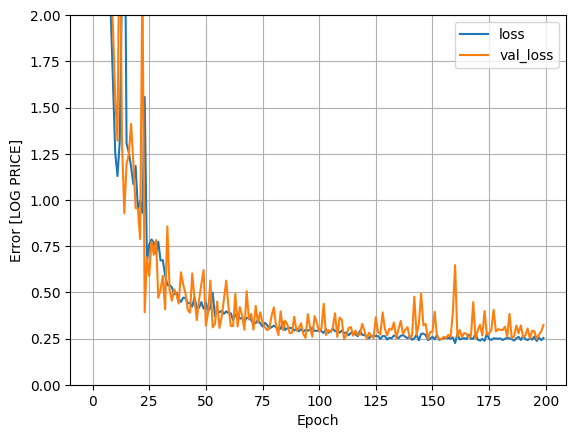

In [ ]:
plot_loss(history, 2)

- https://stackoverflow.com/questions/61287322/validation-loss-sometimes-spiking

In [ ]:
test_results['dnn_model_fc_all'] = model_fc_all.evaluate(
    x={
        'latitude': test_features['latitude'], 
        'longitude': test_features['longitude'], 
        'other_numerical': test_features[numerical],
        'other_categorical': test_features.drop(['latitude','longitude']+numerical,axis=1),
    },
    y=test_label, verbose=0)

In [ ]:
test_results

{'linear_model': [1173385216.0, 969.7213134765625, 34254.7109375],
 'dnn_model': [31000650.0, 152.61968994140625, 5567.82275390625],
 'dnn_model_fc': [0.5520085692405701, 0.7429727911949158],
 'dnn_model_fc_all': [0.31268876791000366, 0.559185802936554]}

In [ ]:
model_fc_all.metrics_names

['loss', 'root_mean_squared_error']

# 7. Hyperparameter Tuning

- https://towardsdatascience.com/hyperparameter-tuning-with-kerastuner-and-tensorflow-c4a4d690b31a

In [ ]:
def build_model(hp):
    """
    Builds model and sets up hyperparameter space to search.
    
    Parameters
    ----------
    hp : HyperParameter object
        Configures hyperparameters to tune.
        
    Returns
    -------
    model : keras model
        Compiled model with hyperparameters to tune.
    """
    # Build the model
    x = concatenated_features
    
    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 5
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 2, 6)):
        x = layers.Dense(hp.Int("units_" + str(i),min_value=32, max_value=512, step=32), activation='relu')(x)
        # Tune dropout layer with values from 0 - 0.3 with stepsize of 0.1
        x = layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1))(x)

    output = layers.Dense(1)(x)
    
    model_hp = tf.keras.Model(inputs=inputs_all, outputs=output)

    # Compile the model
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    model_hp.compile(
        optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=hp_learning_rate),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model_hp

In [ ]:
import kerastuner as kt

# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective="val_loss",
                     max_epochs=100,
                     factor=3,
                     hyperband_iterations=10,
                     directory="kt_dir",
                     project_name="kt_hyperband",)

In [ ]:
# Display search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(
    {
        'latitude': train_features['latitude'], 
        'longitude': train_features['longitude'], 
        'other_numerical': numerical_features,
        'other_categorical': train_features.drop(['latitude','longitude']+numerical,axis=1),
    },
    train_label,
    epochs=100, 
    validation_split=0.2, 
    callbacks=[stop_early], 
    verbose=2,
)

Results of running hyperparameter tuning search for 2432 trials:

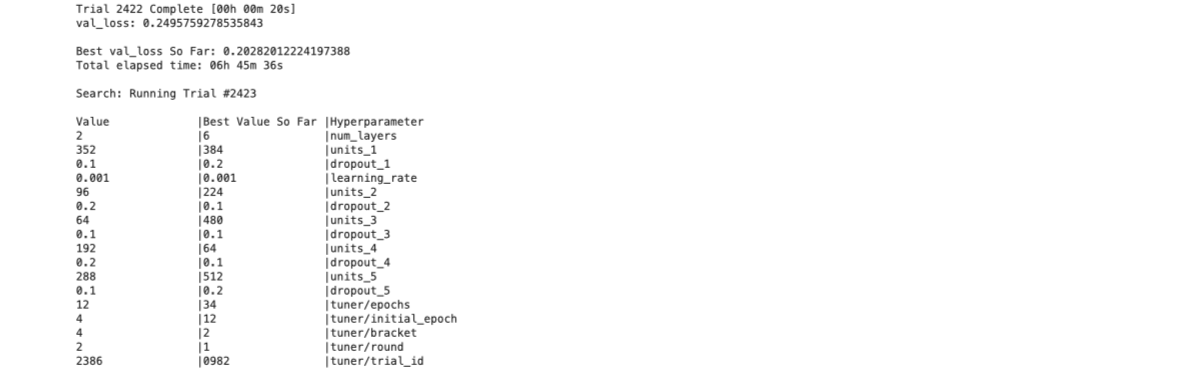

In [ ]:
# Get the optimal hyperparameters from the results
best_hp = tuner.get_best_hyperparameters()[0]
best_hp.values

{'num_layers': 6,
 'units_1': 384,
 'dropout_1': 0.2,
 'learning_rate': 0.001,
 'units_2': 224,
 'dropout_2': 0.1,
 'units_3': 480,
 'dropout_3': 0.1,
 'units_4': 64,
 'dropout_4': 0.1,
 'units_5': 512,
 'dropout_5': 0.2,
 'tuner/epochs': 34,
 'tuner/initial_epoch': 12,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '0982'}

# 8. Final Model (Build & Test)

In [ ]:
# Build model
h_model = tuner.hypermodel.build(best_hps)

# Train the hypertuned model
h_model.fit(    
    {
        'latitude': train_features['latitude'], 
        'longitude': train_features['longitude'], 
        'other_numerical': numerical_features,
        'other_categorical': train_features.drop(['latitude','longitude']+numerical,axis=1),
    },
    train_label,
    epochs=100, 
    validation_split=0.2, 
    callbacks=[stop_early], 
    verbose=2,
)

Epoch 1/100
412/412 - 5s - loss: 2.2550 - root_mean_squared_error: 1.5017 - val_loss: 2.2086 - val_root_mean_squared_error: 1.4861 - 5s/epoch - 11ms/step
Epoch 2/100
412/412 - 1s - loss: 0.9536 - root_mean_squared_error: 0.9765 - val_loss: 1.8114 - val_root_mean_squared_error: 1.3459 - 1s/epoch - 3ms/step
Epoch 3/100
412/412 - 1s - loss: 0.4928 - root_mean_squared_error: 0.7020 - val_loss: 0.4493 - val_root_mean_squared_error: 0.6703 - 1s/epoch - 3ms/step
Epoch 4/100
412/412 - 1s - loss: 0.3087 - root_mean_squared_error: 0.5556 - val_loss: 0.2392 - val_root_mean_squared_error: 0.4891 - 1s/epoch - 3ms/step
Epoch 5/100
412/412 - 1s - loss: 0.2742 - root_mean_squared_error: 0.5237 - val_loss: 0.2302 - val_root_mean_squared_error: 0.4798 - 1s/epoch - 3ms/step
Epoch 6/100
412/412 - 1s - loss: 0.2554 - root_mean_squared_error: 0.5053 - val_loss: 0.2280 - val_root_mean_squared_error: 0.4775 - 1s/epoch - 3ms/step
Epoch 7/100
412/412 - 1s - loss: 0.2466 - root_mean_squared_error: 0.4966 - val_l

<keras.src.callbacks.History>

In [ ]:
test_results['dnn_hyper_model']=h_model.evaluate(
    x={
        'latitude': test_features['latitude'], 
        'longitude': test_features['longitude'], 
        'other_numerical': test_features[numerical],
        'other_categorical': test_features.drop(['latitude','longitude']+numerical,axis=1),
    },
    y=test_label, verbose=0)

In [ ]:
test_results

{'linear_model': [1173385216.0, 969.7213134765625, 34254.7109375],
 'dnn_model': [31000650.0, 152.61968994140625, 5567.82275390625],
 'dnn_model_fc': [0.5520085692405701, 0.7429727911949158],
 'dnn_model_fc_all': [0.31268876791000366, 0.559185802936554],
 'dnn_hyper_model': [0.198111891746521, 0.4450976252555847]}

In [ ]:
h_model.metrics_names

['loss', 'root_mean_squared_error']

# 9. Predictions

In [ ]:
example = {
    'host_response_rate': [.98], # My grandparents respond 98% of the time
     'host_acceptance_rate': [ 1], # Right now they always accept new guests
     'host_total_listings_count': [ 4], # They have 4 units
     'latitude': [ 19.37137], # ...
     'longitude': [ -99.19327],
     'accommodates': [ 4],
     'bathroom_qty': [ 2],
     'bedrooms': [ 2],
     'beds': [ 3],
    'host_response_time':['within_a_day'],
    'host_is_superhost': [True],
    'host_verifications_work_email':[1],
    'host_has_profile_pic': [True],
    'neighbourhood_cleansed': ['alvaro_obregon'],
    'room_type': ['entire_home_apt'],
    'property_description': ['home/apt'],
    'bathroom_type':['private_bath'],
     'gym': [0],
     'pool': [0],
     'kitchen': [1],
     'parking': [1],
     'washer': [1],
     'dryer': [1],
     'conditioning': [0],
     'heating': [0],
     'workspace': [1],
     'tv': [1],
     'hair dryer': [0],
     'iron': [1],
     'hot tub': [0],
     'crib': [0],
     'bbq': [0],
     'fireplace': [0],
     'smoking': [0],
     'coffee maker': [1],
     'instant_bookable': ['True'],
    
}
example_df = pd.DataFrame.from_dict(example)
example_df.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathroom_qty,bedrooms,beds,host_response_time,...,tv,hair dryer,iron,hot tub,crib,bbq,fireplace,smoking,coffee maker,instant_bookable
0,0.98,1,4,19.37137,-99.19327,4,2,2,3,within_a_day,...,1,0,1,0,0,0,0,0,1,True


In [ ]:
bool(True)

True

In [ ]:
# 1. Get the structure of the original dataframe
original_structure = train_features.columns

# 2. Apply pd.get_dummies to the example_df
example_df = pd.get_dummies(example_df, columns=categorical, drop_first=True)

# 3. Add missing columns to example_df
missing_cols = set(original_structure) - set(example_df.columns)
for col in missing_cols:
    example_df[col] = 0

# 4. Ensure the order of columns is the same as in 'data'
example_df = example_df[original_structure]
example_df.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathroom_qty,bedrooms,beds,host_response_time_within_a_day,...,tv_1,hair dryer_1,iron_1,hot tub_1,crib_1,bbq_1,fireplace_1,smoking_1,coffee maker_1,instant_bookable_True
0,0.98,1,4,19.37137,-99.19327,4,2,2,3,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
example_df=example_df.astype('float32')

In [ ]:
price_unit = np.exp(h_model.predict(
    {
        'latitude': example_df['latitude'], 
        'longitude': example_df['longitude'], 
        'other_numerical': example_df[numerical],
        'other_categorical': example_df.drop(['latitude','longitude']+numerical,axis=1),
    }
))[0][0]
print('Predicted base price for the unit: $', price_unit, 'MXN/night')

1/1 [==============================] - 0s 12ms/step
Predicted base price for the unit: $ 1367.786 MXN/night
